### Import Libraries

In [71]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import warnings

warnings.filterwarnings("ignore")

- `Single Run`

In [19]:
# Define number of categories (k) and number of trials (n)
k = 6  # Number of sides on a die
n = 10  # Number of rolls

# Sample probabilities for each category (adjust as needed)
p = np.array([0.1, 0.1, 0.5, 0.1, 0.1, 0.1])  # Probabilities for each side (1 to 6)
print("Sample probabilities --> ", p)

# Simulate outcome counts (number of times each side appears in 10 rolls)
outcome_counts = np.random.multinomial(n, p)
print("outcome_counts --> ", outcome_counts)

# Loop to print probabilities for all outcomes (adjust as needed)
for i in range(k):
    print(" >> Probability of getting", i+1, ":", outcome_counts[i])


Sample probabilities -->  [0.1 0.1 0.5 0.1 0.1 0.1]
outcome_counts -->  [1 1 3 0 1 4]
 >> Probability of getting 1 : 1
 >> Probability of getting 2 : 1
 >> Probability of getting 3 : 3
 >> Probability of getting 4 : 0
 >> Probability of getting 5 : 1
 >> Probability of getting 6 : 4


Observation

- Outcome_counts = np.random.multinomial(n, p). This doesnt matches with given probabilities i.e., [0.1, 0.1, 0.5, 0.1, 0.1, 0.1], here we are given that dice side 3 should have more count / probability to come, but it is not the case in generated outcome, because
    - np.random.multinomial(n, p) generates random samples based on these probabilities.
    - In each run, the outcome counts will vary due to the inherent randomness in the simulation.
    - Though it considers the above given/suggested/biased probabilities to generate a random sample of outcome counts for the 10 rolls, we except a bias towards certain outcomes (e.g., side 3 with a probability of 0.5). But when you run np.random.multinomial once, it doesn't guarantee that side 3 will always appear the most.
- .Hence it required to run more times instead of just single run/size i.e., 1


- `Multiple Runs`

In [20]:
# Define number of categories (k) and number of trials (n)
k = 6  # Number of sides on a dice
n = 10  # Number of rolls

# Sample probabilities for each category (adjust as needed)
p = np.array([0.1, 0.1, 0.5, 0.1, 0.1, 0.1])  # Probabilities for each side (1 to 6)
print("Sample probabilities --> ", p)

# Number of runs, to get biased dice counts as per each dice side following above mentioned probabilities
sample_size = 20

# Simulate outcome counts (number of times each side appears in 10 rolls)
outcome_counts = np.random.multinomial(n, p, size=sample_size)
print("outcome_counts")
print(outcome_counts)


Sample probabilities -->  [0.1 0.1 0.5 0.1 0.1 0.1]
outcome_counts
[[1 1 3 2 2 1]
 [3 1 3 2 1 0]
 [1 1 4 2 1 1]
 [1 1 6 0 2 0]
 [1 1 5 0 1 2]
 [0 2 2 2 3 1]
 [2 2 4 1 1 0]
 [0 0 5 3 0 2]
 [1 1 5 0 2 1]
 [2 2 5 0 0 1]
 [0 1 8 0 0 1]
 [1 1 5 1 1 1]
 [1 0 3 3 1 2]
 [2 0 8 0 0 0]
 [2 2 5 0 0 1]
 [0 0 5 2 0 3]
 [1 1 3 1 3 1]
 [2 0 5 1 0 2]
 [0 2 3 1 4 0]
 [2 2 5 1 0 0]]


- With Counts

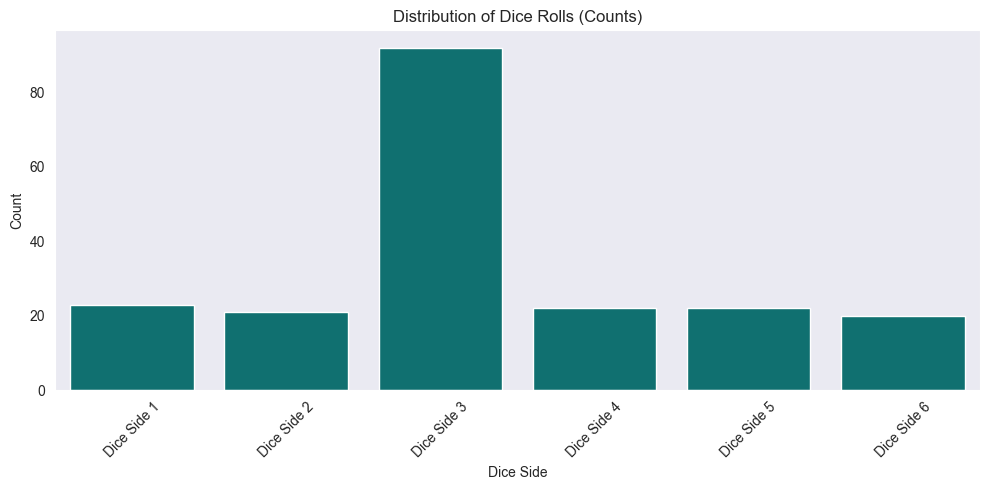

In [99]:
cols = ["Dice Side 1", "Dice Side 2", "Dice Side 3", "Dice Side 4", "Dice Side 5", "Dice Side 6"]
df = pd.DataFrame(outcome_counts, columns=cols)

# Get total counts for each die side across all samples
total_counts = df.sum(axis=0)

# Plot
sns.set_style("dark")
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 

# Create bar plot with color customization (optional)
sns.barplot(x=cols, y=total_counts, color='teal')  # Adjust color as desired

# Customize plot labels and title
plt.xlabel("Dice Side")
plt.ylabel("Count")
plt.title("Distribution of Dice Rolls (Counts)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

- With Probability

In [87]:
df_prob = df.iloc[0:0].copy(deep=True)

for index, row in df.iterrows():
    prob_new_row = {"Dice Side 1":[], "Dice Side 2":[], "Dice Side 3":[], "Dice Side 4":[], "Dice Side 5":[], "Dice Side 6":[]}
    for side in range(1, k + 1):
        count = row[f"Dice Side {side}"]
        probability = count/n
        # print(f"index --> {index}, side --> {side}, probability --> {probability}")
        prob_new_row[f"Dice Side {side}"] = probability
    # print(f"index --> {index}, prob_new_row --> {prob_new_row}")
    df_prob = pd.concat([df_prob, pd.DataFrame(prob_new_row, index=[0])], ignore_index=True)
    

In [88]:
df_prob

,Dice Side 1,Dice Side 2,Dice Side 3,Dice Side 4,Dice Side 5,Dice Side 6
0,0.1,0.1,0.3,0.2,0.2,0.1
1,0.3,0.1,0.3,0.2,0.1,0.0
2,0.1,0.1,0.4,0.2,0.1,0.1
3,0.1,0.1,0.6,0.0,0.2,0.0
4,0.1,0.1,0.5,0.0,0.1,0.2
5,0.0,0.2,0.2,0.2,0.3,0.1
6,0.2,0.2,0.4,0.1,0.1,0.0
7,0.0,0.0,0.5,0.3,0.0,0.2
8,0.1,0.1,0.5,0.0,0.2,0.1
9,0.2,0.2,0.5,0.0,0.0,0.1


In [74]:
# # Plotting
# fig, axes = plt.subplots(2, 1, figsize=(10, 4), sharex=True)

# # Plotting the first set of bars
# sns.barplot(data=df.iloc[0,:], ax=axes[0], palette = "muted")
# axes[0].set_title('First Set of Bars')

# # Plotting the second set of bars
# sns.barplot(data=df.iloc[1,:], ax=axes[1], palette = "Blues_d")
# axes[1].set_title('Second Set of Bars')

# plt.show()

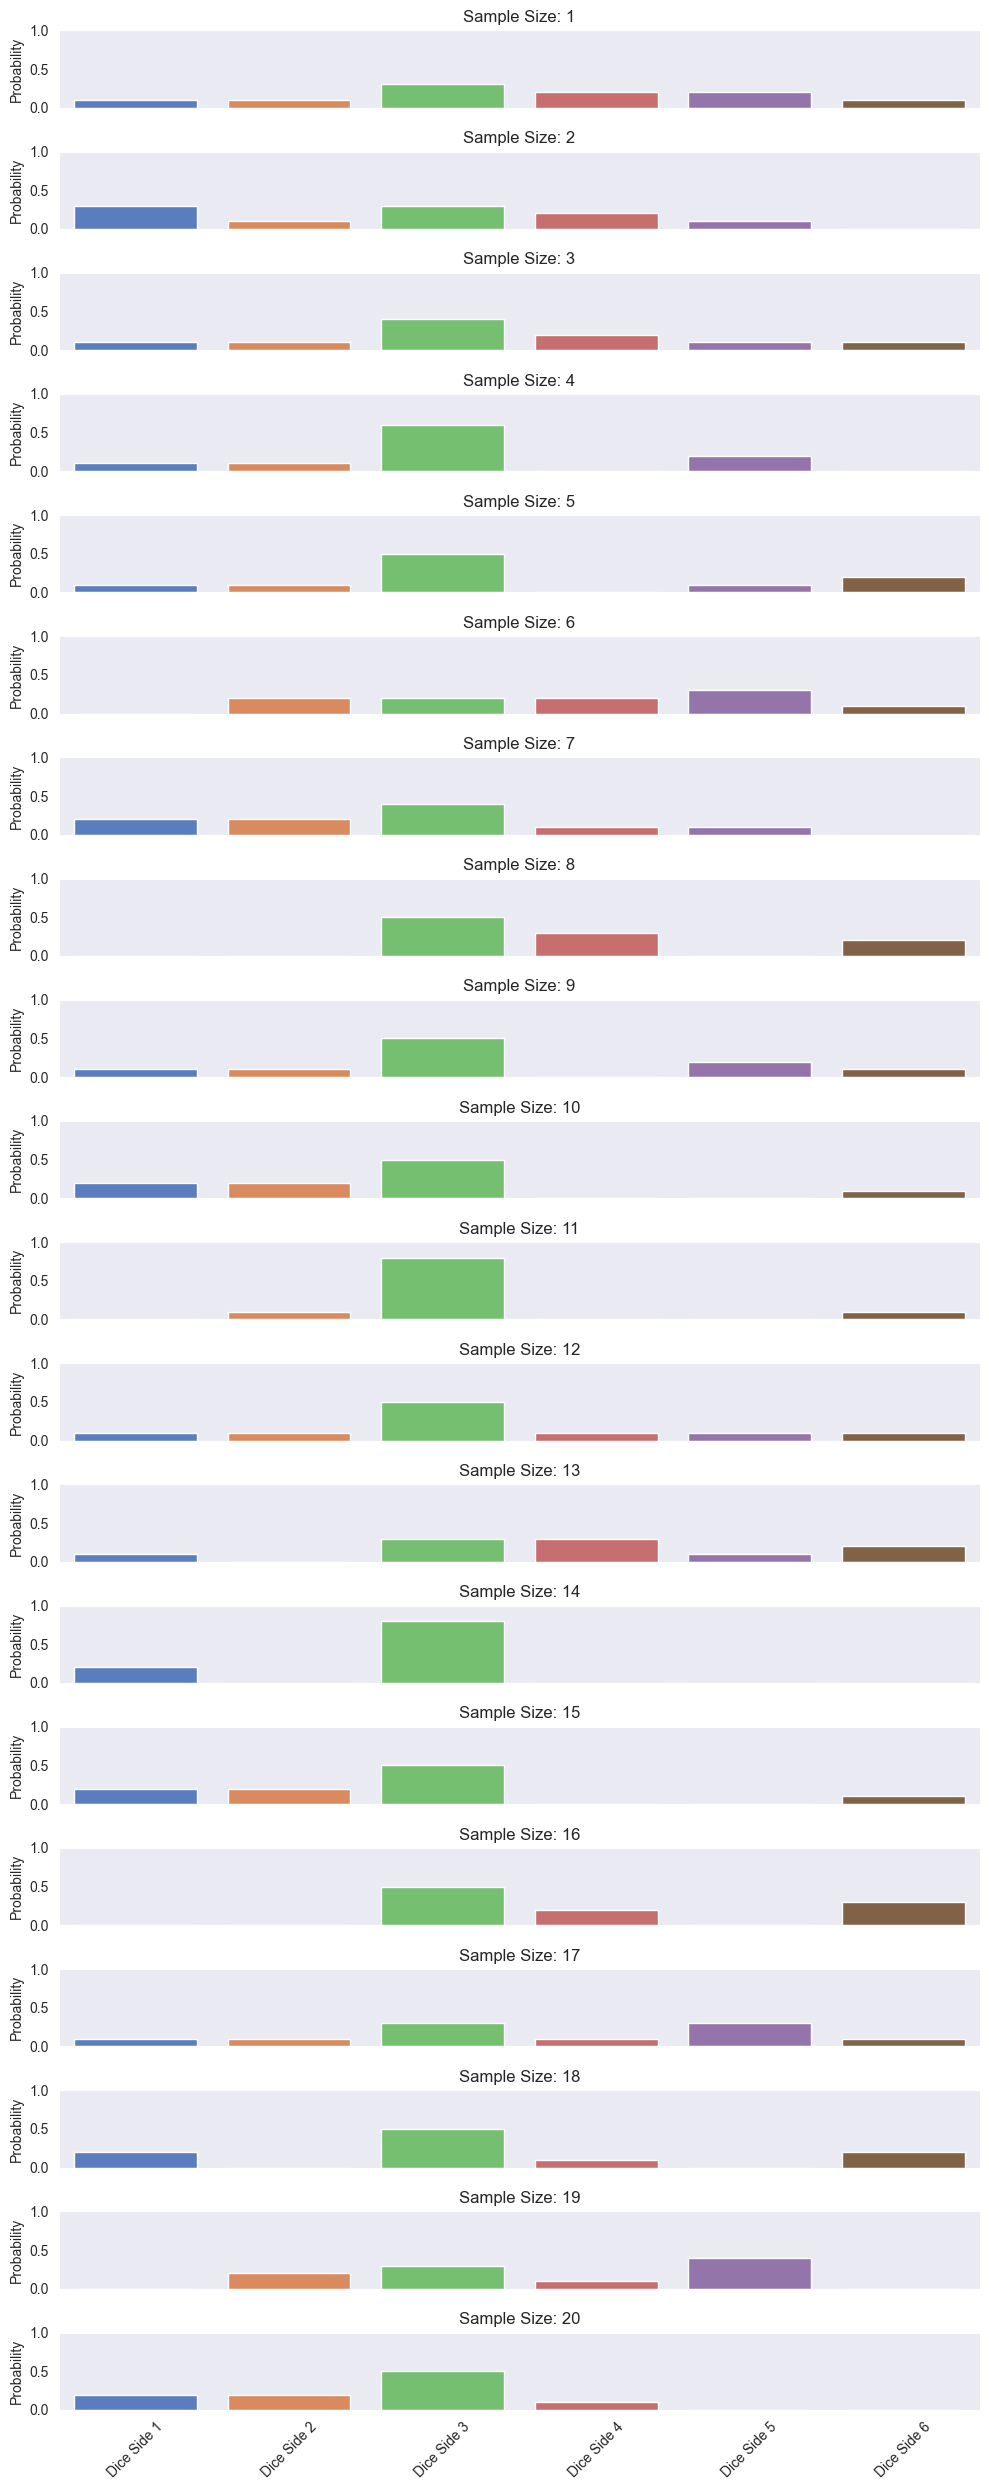

In [98]:
# Plotting
sns.set_style("dark")
fig, axes = plt.subplots(sample_size, 1, figsize=(10, 25), sharex=True, sharey=True) 

# Plotting the first set of bars
for i in range(1, sample_size + 1):
    sns.barplot(data=df_prob.iloc[i-1,:], ax=axes[i-1], palette = "muted")
    axes[i-1].set_title(f'Sample Size: {i}')
    axes[i-1].set_ylabel("Probability")
    axes[i-1].set_ylim(0, 1)

# plt.title("Distribution of Dice Rolls (probability)")    
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observation

- With a larger number of runs, the average counts should get closer to the expected values based on the probabilities.
- If you run the code multiple times, you'll likely see different outcome counts each time (due to randomness).
- Over a large number of runs (thousands or millions), the average outcome counts should approach the expected values based on the probabilities i.e., [0.1, 0.1, 0.5, 0.1, 0.1, 0.1] we suggested may be behaviour is like this behaved something like bias.
- The multinomial distribution helps us understand the likelihood of observing certain patterns, not guaranteeing them in every single sample.
- Above data and both plots shows correct because now we see dice side 3 occuring more than other sides out of 10 rolls [which is one experiment] on a average of overall 20 experiments, which is based on our provided probabilities.